##**Project Name: House Prices- Advance Regression Techniques**

The main aim of this project is to predict the house price based on various features

**Dataset can be downloaded from the link below (might need accept the competition to download it).**
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

**Following the below lifecycle for this project**


1.   Data Analaysis
2.   Feature Engineering
3.   Feature Scaling
4.   Model Training and Testing
5.   Baseline Model for submission


Extracting data directly from kaggle, we will need kaggle.json file which we can upload to our notebook directory

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#link for downloading the dataset from kaggle
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 20.8MB/s]


In [ ]:
#As the downloaded file is in zip format extracting all the file in the directory
import zipfile
zip_ref = zipfile.ZipFile('/content/house-prices-advanced-regression-techniques.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8

In [ ]:
#import required libraries for data analysis
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.display import display


from sklearn.preprocessing import OneHotEncoder #for Converting Ordinal categorical features to numerical
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor, Lasso, Ridge, ElasticNet, HuberRegressor, OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
import lightgbm as lgb

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from pycaret.regression import setup , compare_models


In [ ]:
#loading the dataset
#As we can, we have train and test dataset present separately, and to perform EDA we will combine it
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_full = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
print("Shape of train dataset :" , df_train.shape)
print("Shape of test dataset :" , df_test.shape)
print("Shape of concatenated :" , df_full.shape)

Shape of train dataset : (1460, 81)
Shape of test dataset : (1459, 80)
Shape of concatenated : (2919, 81)


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df_full.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## **EDA(Exploratory Data Analysis)**

Below are the steps been taken for analysis

1.   Understanding the data
1.   Missing Values
2.   Obtaining all the numerical Variables
3.   Distribution of Numberical Variables with Target variable
4.   Obtaining all the Categorical Variables
5.   Distribution of Categorical Variables with Target variable
6.   Outlier Detection

1. **Understanding the data**

In [ ]:
#Checking all the columns to understand varibales present in our dataset, taking only training dataset as I need to compare the target variables
df = df_train.copy()

In [ ]:
#Getting statistical information of features
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(len(df['Id']))
#As we can see ID is unique identifier so we can remove it from the dataset later or set it as index but I decided to drop it.

1460


In [ ]:
df.drop('Id', axis=1, inplace=True)
df_full.drop('Id', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)
test_id = df_test['Id']
df_test.drop('Id', axis=1, inplace=True)

In [ ]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

2. **Missing Values**

In [ ]:
# We can also see there are null values persent in the dataset, Let see what how many null values are present
# Creating list of feature which have null(nan) values in percentage for better understanding
Feature_with_na = [features for features in df.columns if df[features].isna().sum()]

print ("Number of variables having missing values :" , len(Feature_with_na))
for features in Feature_with_na:
  print(features, np.round(df[features].isna().sum()/len(df[features])*100,4), ' % missing values')

Number of variables having missing values : 19
LotFrontage 17.7397  % missing values
Alley 93.7671  % missing values
MasVnrType 59.726  % missing values
MasVnrArea 0.5479  % missing values
BsmtQual 2.5342  % missing values
BsmtCond 2.5342  % missing values
BsmtExposure 2.6027  % missing values
BsmtFinType1 2.5342  % missing values
BsmtFinType2 2.6027  % missing values
Electrical 0.0685  % missing values
FireplaceQu 47.2603  % missing values
GarageType 5.5479  % missing values
GarageYrBlt 5.5479  % missing values
GarageFinish 5.5479  % missing values
GarageQual 5.5479  % missing values
GarageCond 5.5479  % missing values
PoolQC 99.5205  % missing values
Fence 80.7534  % missing values
MiscFeature 96.3014  % missing values


<Axes: >

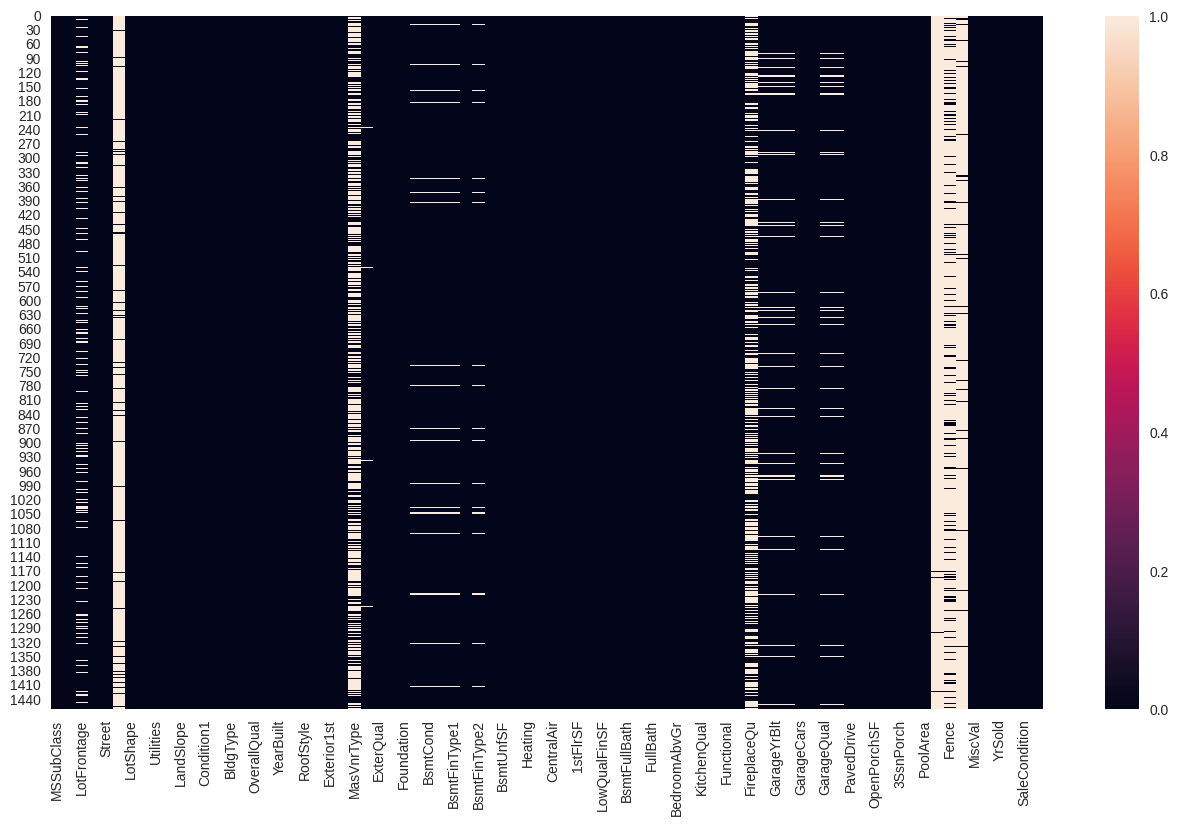

In [ ]:
#Visualizing the missing values
plt.figure(figsize=(16,9))
sn.heatmap(df.isna())

Since there are alot of missing values, we will need to check if there is a relationship between missing values with Target Variable, which in this case is Sales Price

Let's analyze it with diagram for better understanding


As we can observe clearly that the missing values has relationship with Target variable (Sales Price).

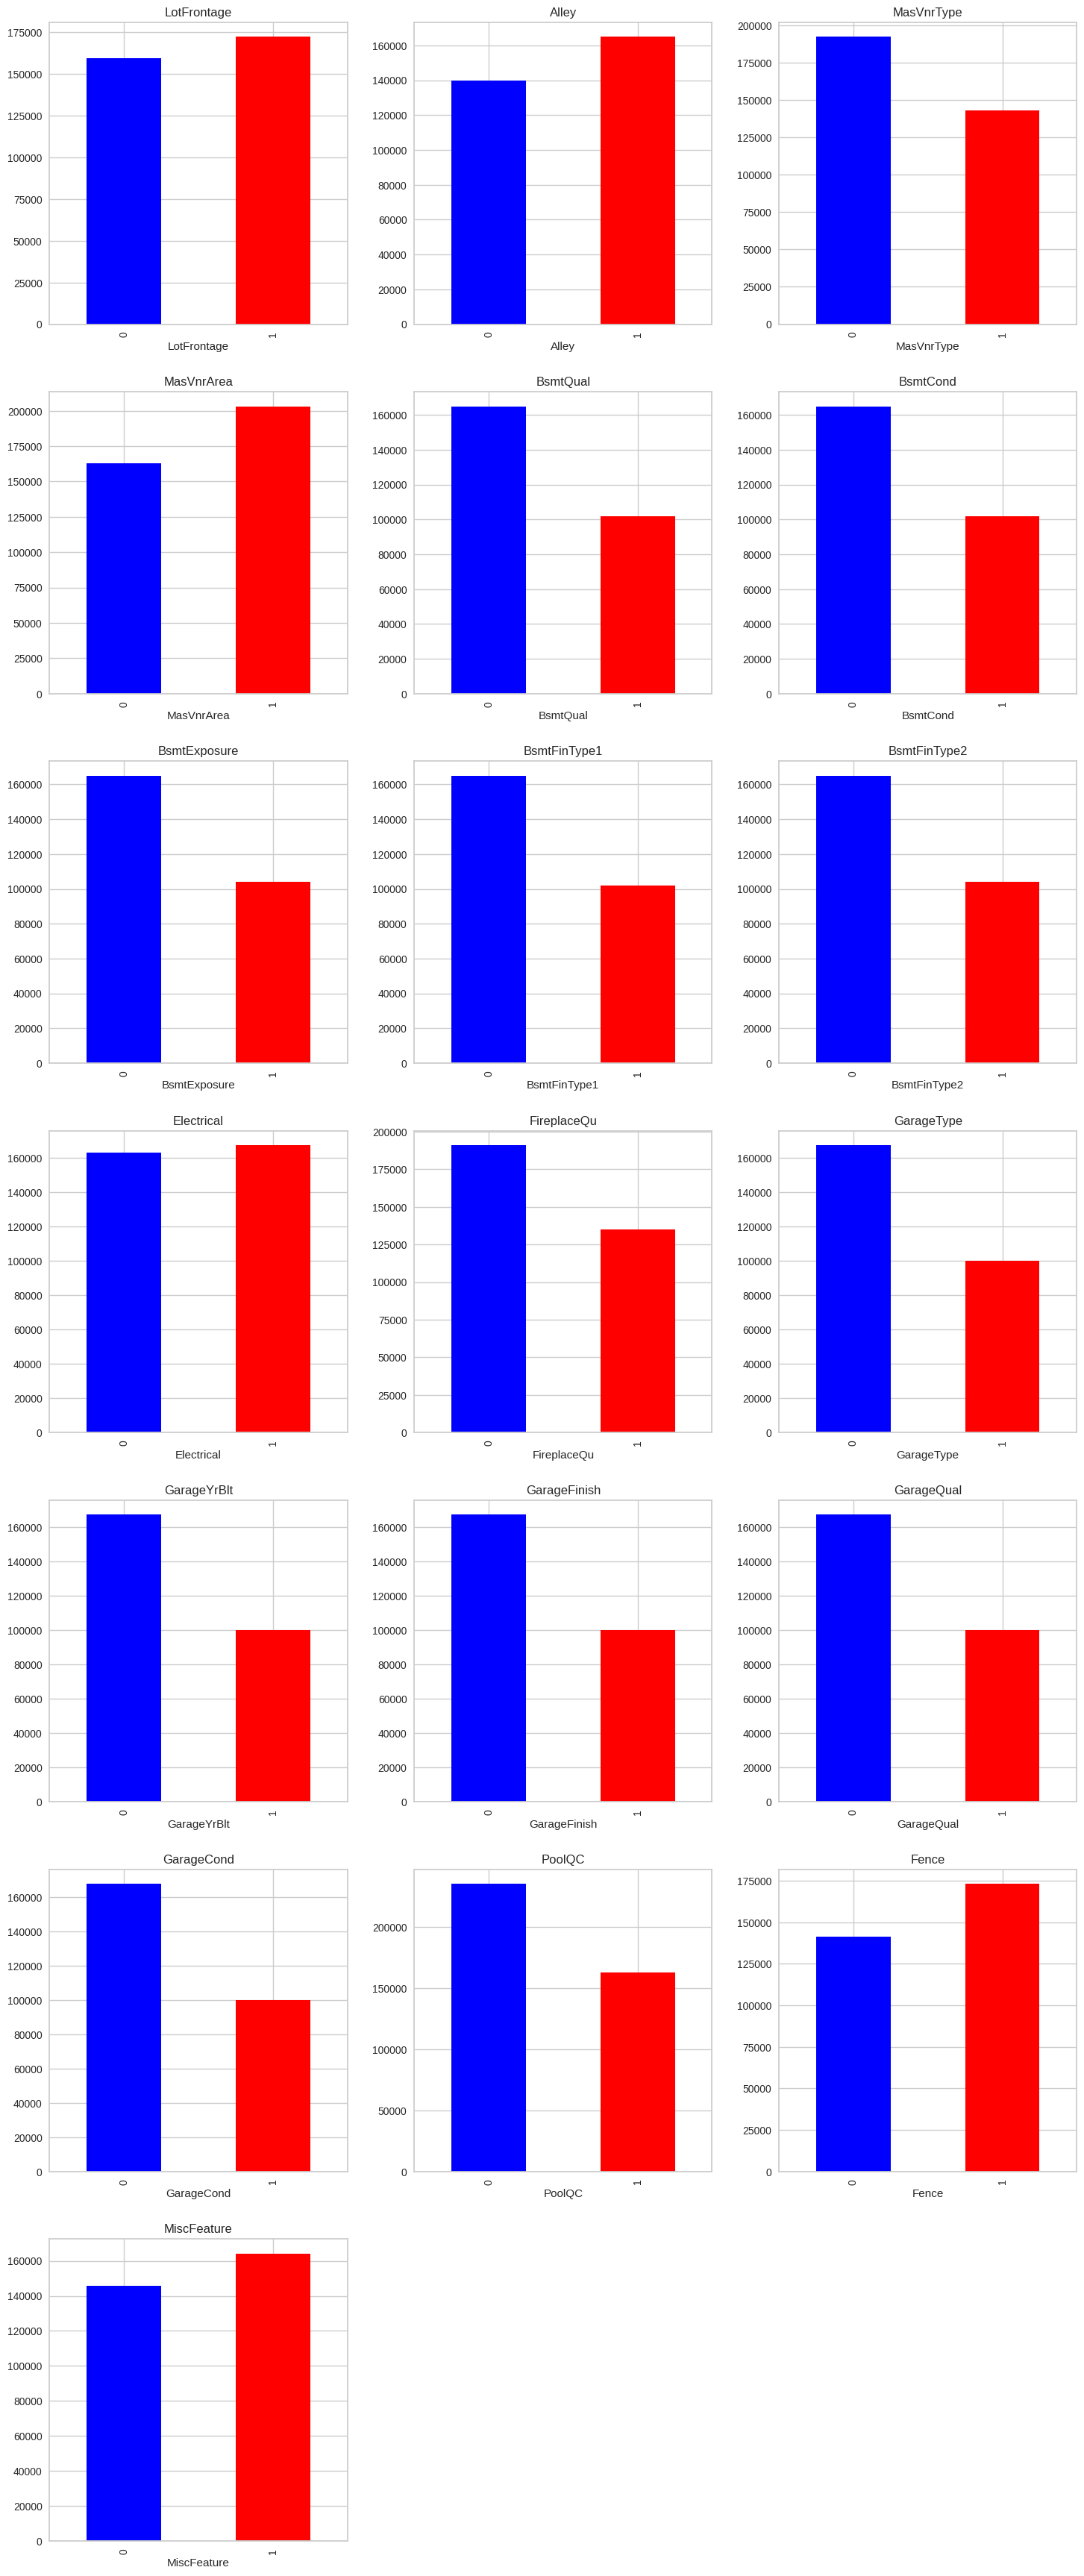

In [ ]:

# Calculating the number of rows and columns for subplots, as I want 3 columns and rest will be with number of features present
n_plots = len(Feature_with_na)
n_cols = 3
n_rows = -(-n_plots // n_cols)

# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flattening the axs array if more than one row
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Defining colors for bars representing 1s and 0s
colors = {0: 'blue', 1: 'red'}

# Ploting each feature
for idx, feature in enumerate(Feature_with_na):

    # Copy the dataset so the changes are not reflected in actual dataset
    data_for_null = df.copy()

    # Creating a variable indicating missing values
    data_for_null[feature] = np.where(data_for_null[feature].isna(), 1, 0)

    # Calculating the median SalePrice where information is missing or present
    plot_data = data_for_null.groupby(feature)['SalePrice'].median()

    # Creating the bar plot
    plot_data.plot.bar(ax=axs[idx], color=[colors[val] for val in plot_data.index])
    axs[idx].set_title(feature)

# Hiding any unused subplots
for i in range(n_plots, len(axs)):
    fig.delaxes(axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(pad=2.0)
plt.show()



<Axes: >

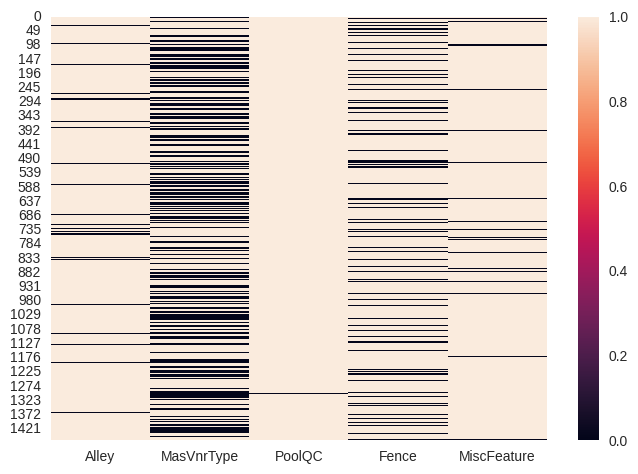

In [ ]:
#Let's check if we need to drop any feature where more than 50% of data is missing
Features_nan = np.round(df.isna().sum()/len(df[features])*100,4)
Feature_with_nan_more_than_50 = Features_nan[Features_nan > 50]
Feature_with_nan_more_than_50
sn.heatmap(df[Feature_with_nan_more_than_50.keys()].isna())

<Axes: >

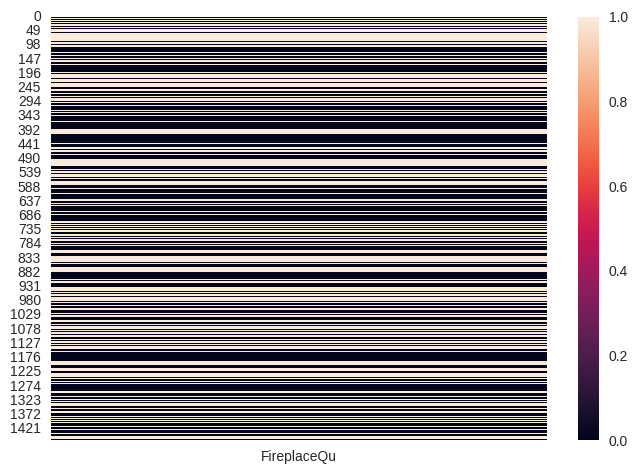

In [ ]:
#Let's check if we need to drop any feature where missing data is between 20 and 50
Feature_with_nan_bw_20_50 = Features_nan[(Features_nan < 50 ) & (Features_nan > 20)]
Feature_with_nan_bw_20_50
sn.heatmap(df[Feature_with_nan_bw_20_50.keys()].isna())

<Axes: >

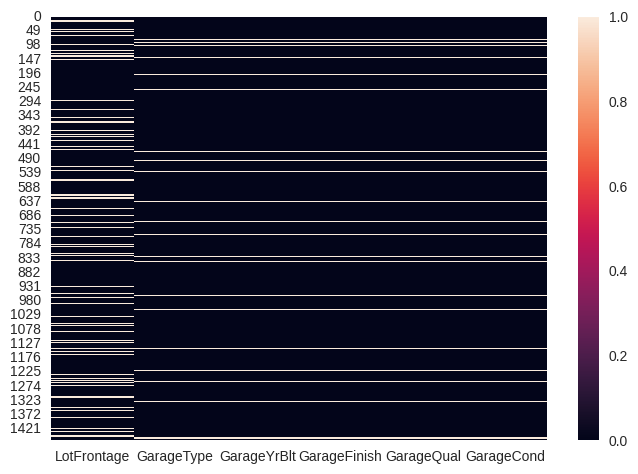

In [ ]:
#Let's check if we need to drop any feature where missing data is between 5 and 20
Feature_with_nan_bw_5_20 = Features_nan[(Features_nan < 20 ) & (Features_nan > 5)]
Feature_with_nan_bw_5_20
sn.heatmap(df[Feature_with_nan_bw_5_20.keys()].isna())

<Axes: >

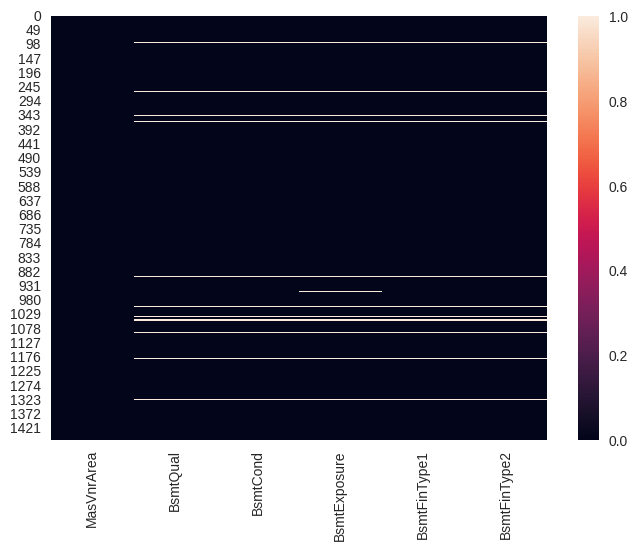

In [ ]:
Feature_with_nan_below_5 = Features_nan[(Features_nan < 5 ) & (Features_nan > 0.5)]
Feature_with_nan_below_5
sn.heatmap(df[Feature_with_nan_below_5.keys()].isna())

After checking the NA values description in the dataset from the provided documentation we can see that the NA is label for  some specific feature is not present but it was captured so cannot drop the feature. All the features having missing values as NA as label will be replaced as constant value and other will be replaced with imputation

3. **Performing Analysis on Numerical Variables**

In [ ]:
#list of numerical values
numerical_features = [features for features  in df.columns if df[features].dtypes !='O' ]
print('Number of numerical features:' , len(numerical_features))

df[numerical_features].head()

Number of numerical features: 36


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#Let analyze the sales price over the Year

#Obtaining the features with year
year_features =[features for features in numerical_features if 'Yr' in features or 'Year' in features]

year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
#getting unique values of year features
for features in year_features:
  print(features, len(df[features].unique()))

YearBuilt 112
YearRemodAdd 61
GarageYrBlt 98
YrSold 5


Text(0.5, 1.0, 'Sales Price over the year')

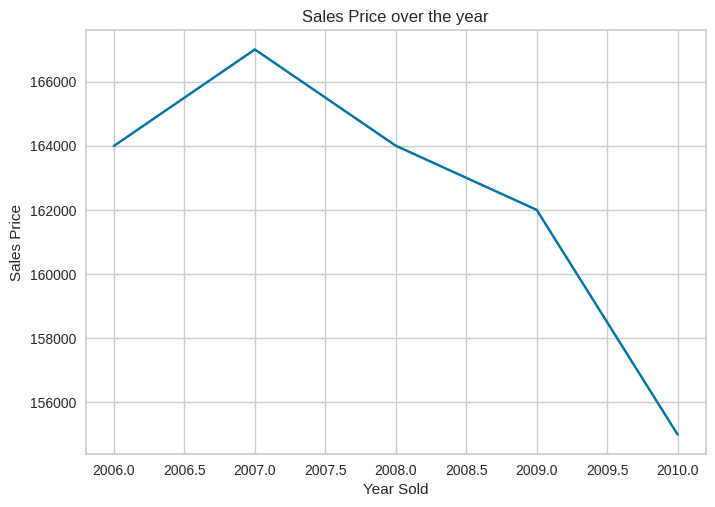

In [ ]:
#From above, lets check the realtionship of Year Sold with Sales Price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sales Price')
plt.title('Sales Price over the year')

From above, looks like the house price decrease over the year which is usually not the case

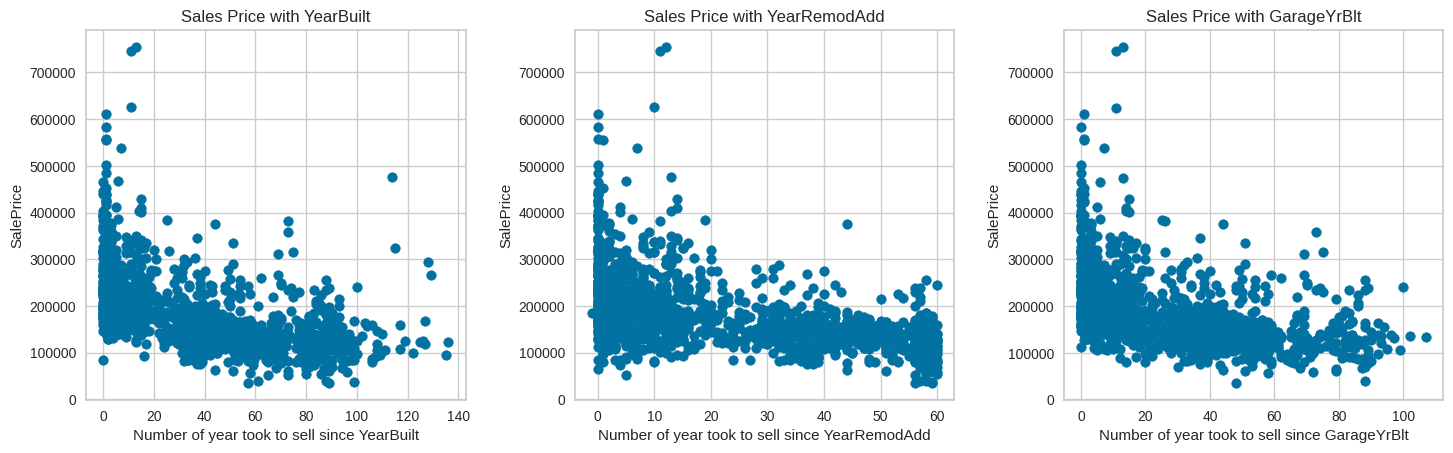

In [ ]:
# Calculating the number of rows and columns for subplots
n_plots = len(year_features)-1
n_cols = n_plots  # All plots in a single row
n_rows = 1

# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Ploting chart for each feature
for idx, feature in enumerate(year_features):
    if feature != 'YrSold':
        # Copying the dataset so we do not make any changes to actuall dataset
        data_for_year = df.copy()

        # Calculating the difference
        data_for_year[feature] = data_for_year['YrSold'] - data_for_year[feature]

        # Scatter plot for each feature
        axs[idx].scatter(data_for_year[feature], data_for_year['SalePrice'])
        axs[idx].set_xlabel(f'Number of year took to sell since {feature}')
        axs[idx].set_ylabel('SalePrice')
        axs[idx].set_title(f'Sales Price with {feature}')

# Adjusting layout
plt.subplots_adjust(wspace=0.4)
plt.tight_layout(pad=2.0)
plt.show()

4. **Distribution of Numberical Variables with Target variable**
**Numerical Varibales**

In [ ]:
#There are usually 2 type of Numerical varibales (Discrete and Continous)

#Getting Discrete variable
discrete_variables = [features for features in numerical_features if len(df[features].unique())<25]
discrete_variables

['OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
df[discrete_variables].head()

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


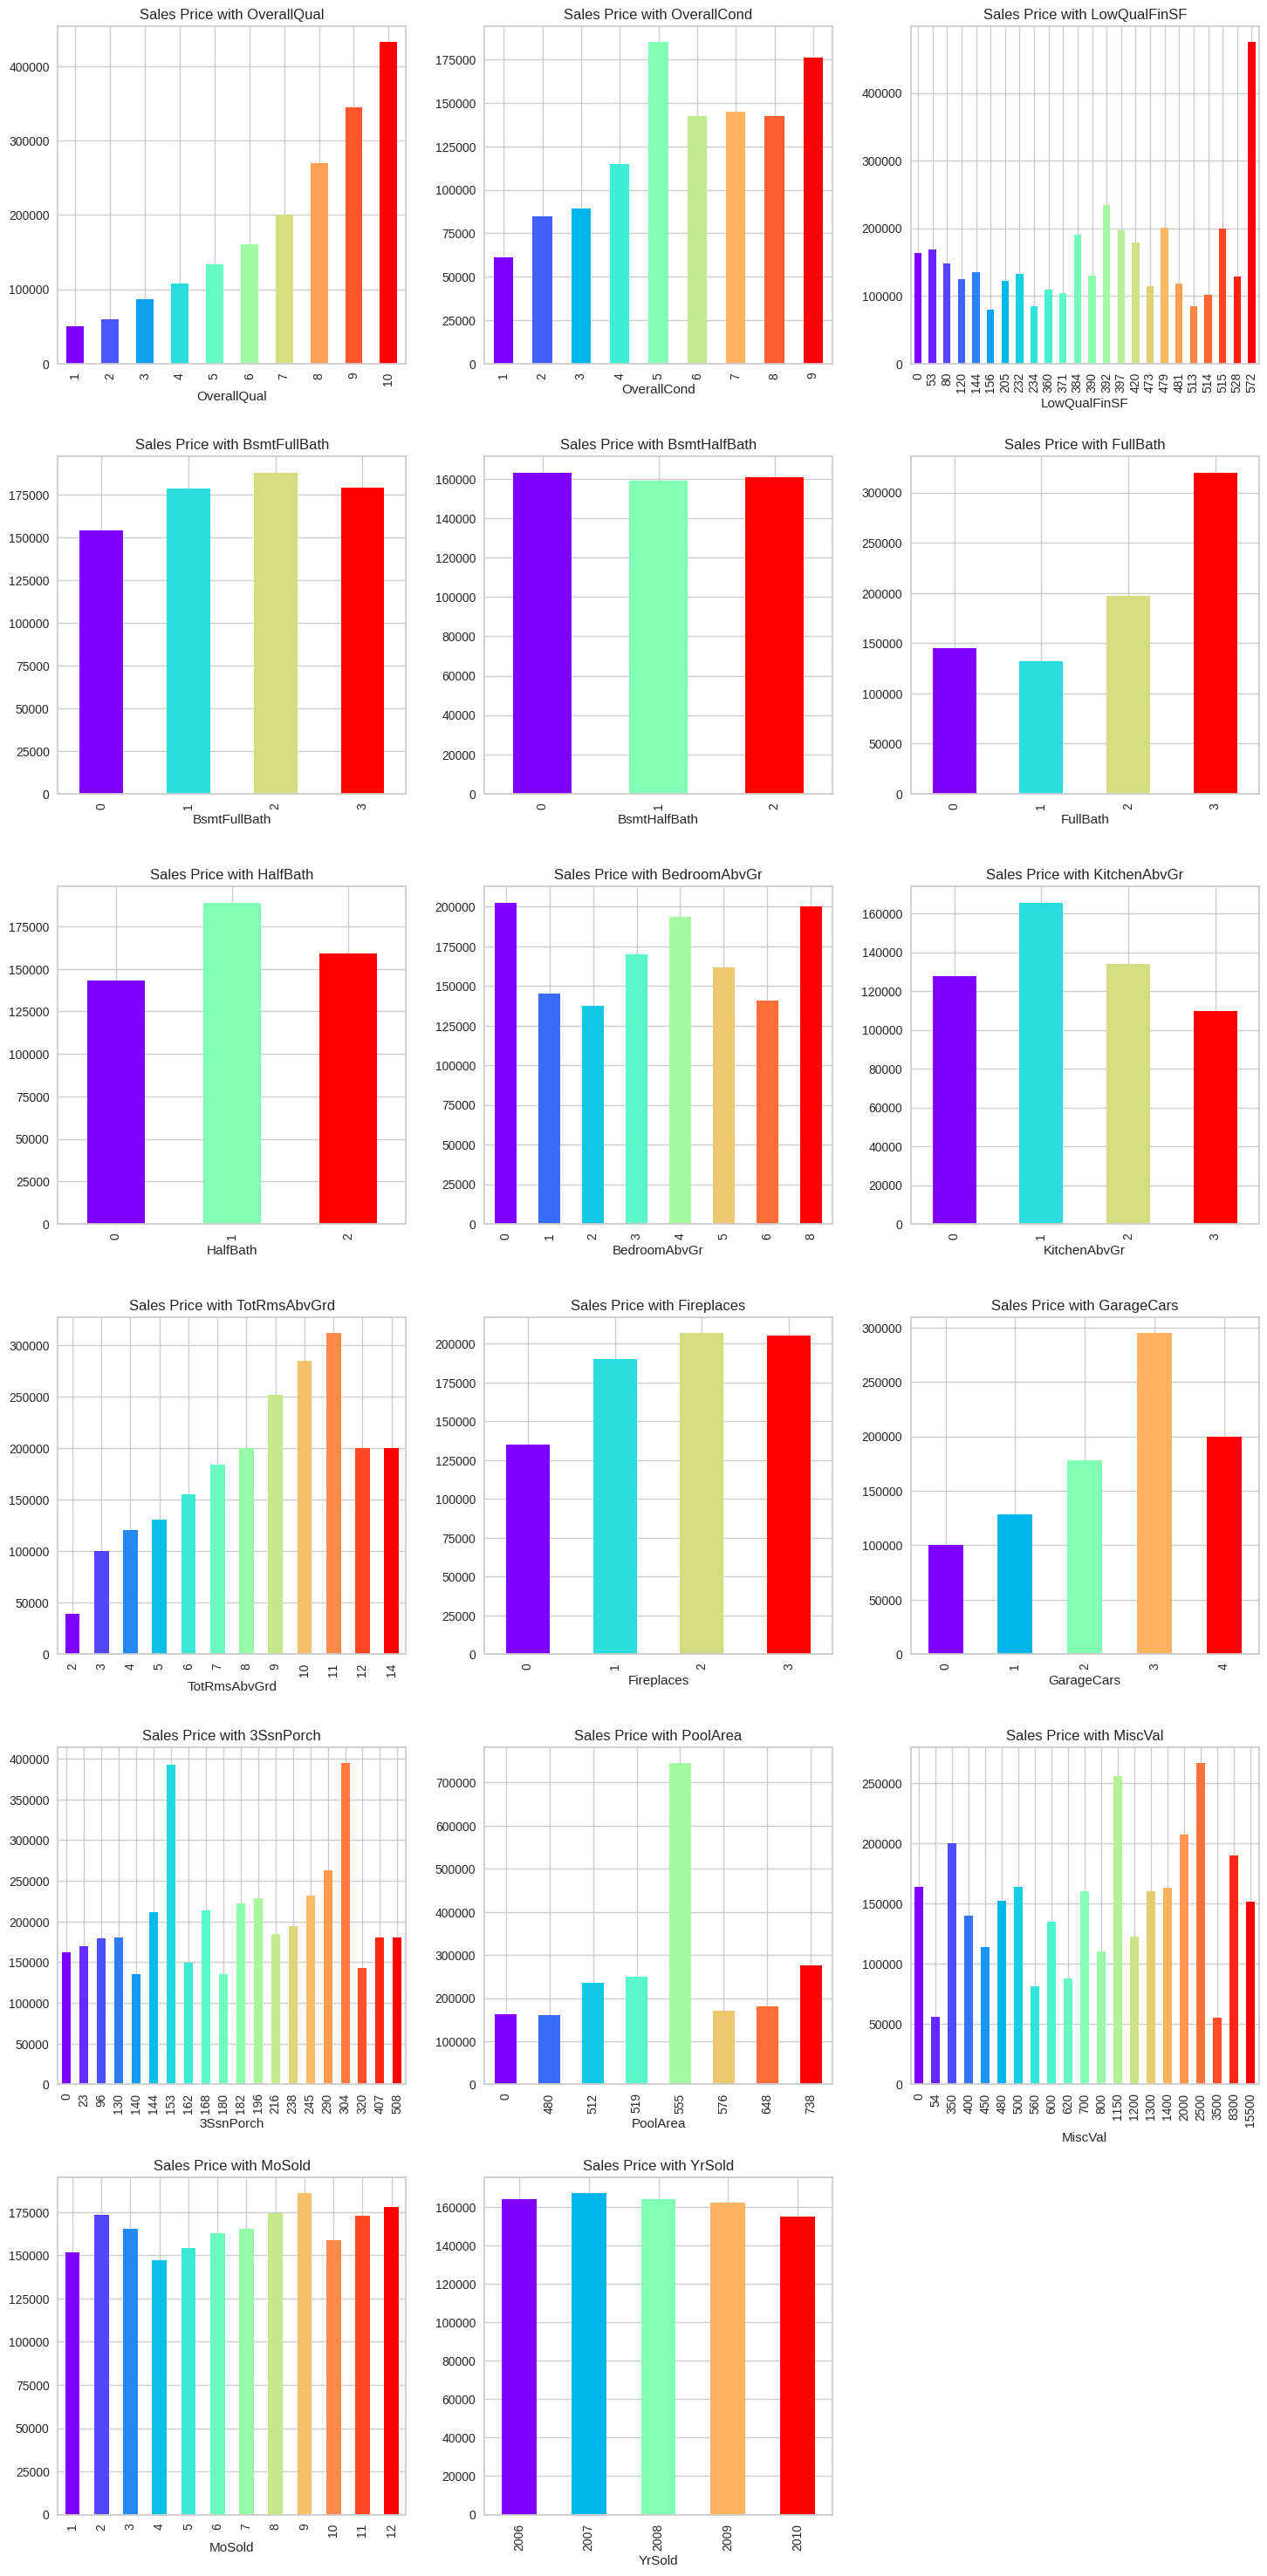

In [ ]:
# Calculating the number of rows and columns for subplots, as I want 3 columns and rest will be with number of feat
n_plots = len(discrete_variables)
n_cols = 3
n_rows = -(-n_plots // n_cols)

# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flattening the axs array if more than one row
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Ploting chart for  each feature
for idx, feature in enumerate(discrete_variables):

    # Copying the dataset
    data_for_discrete = df.copy()

    # Calculating the median SalePrice with discrete variables
    plot_data = data_for_discrete.groupby(feature)['SalePrice'].median()

    # Creating a colormap for better visuals
    colors = cm.rainbow(np.linspace(0, 1, len(plot_data)))

    # Creating the bar plot
    plot_data.plot.bar(ax=axs[idx], color = colors)
    axs[idx].set_title(f'Sales Price with {feature}')


# Hiding any unused subplots
for i in range(n_plots, len(axs)):
    fig.delaxes(axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(pad=2.0)
plt.show()

**Continous Variable**

In [ ]:
#Obtaining all the continous variables
continous_varibales = [features for features in numerical_features if features not in discrete_variables+year_features]

print('Count of Continous varibables :{}'.format(len(continous_varibales)))

Count of Continous varibables :16


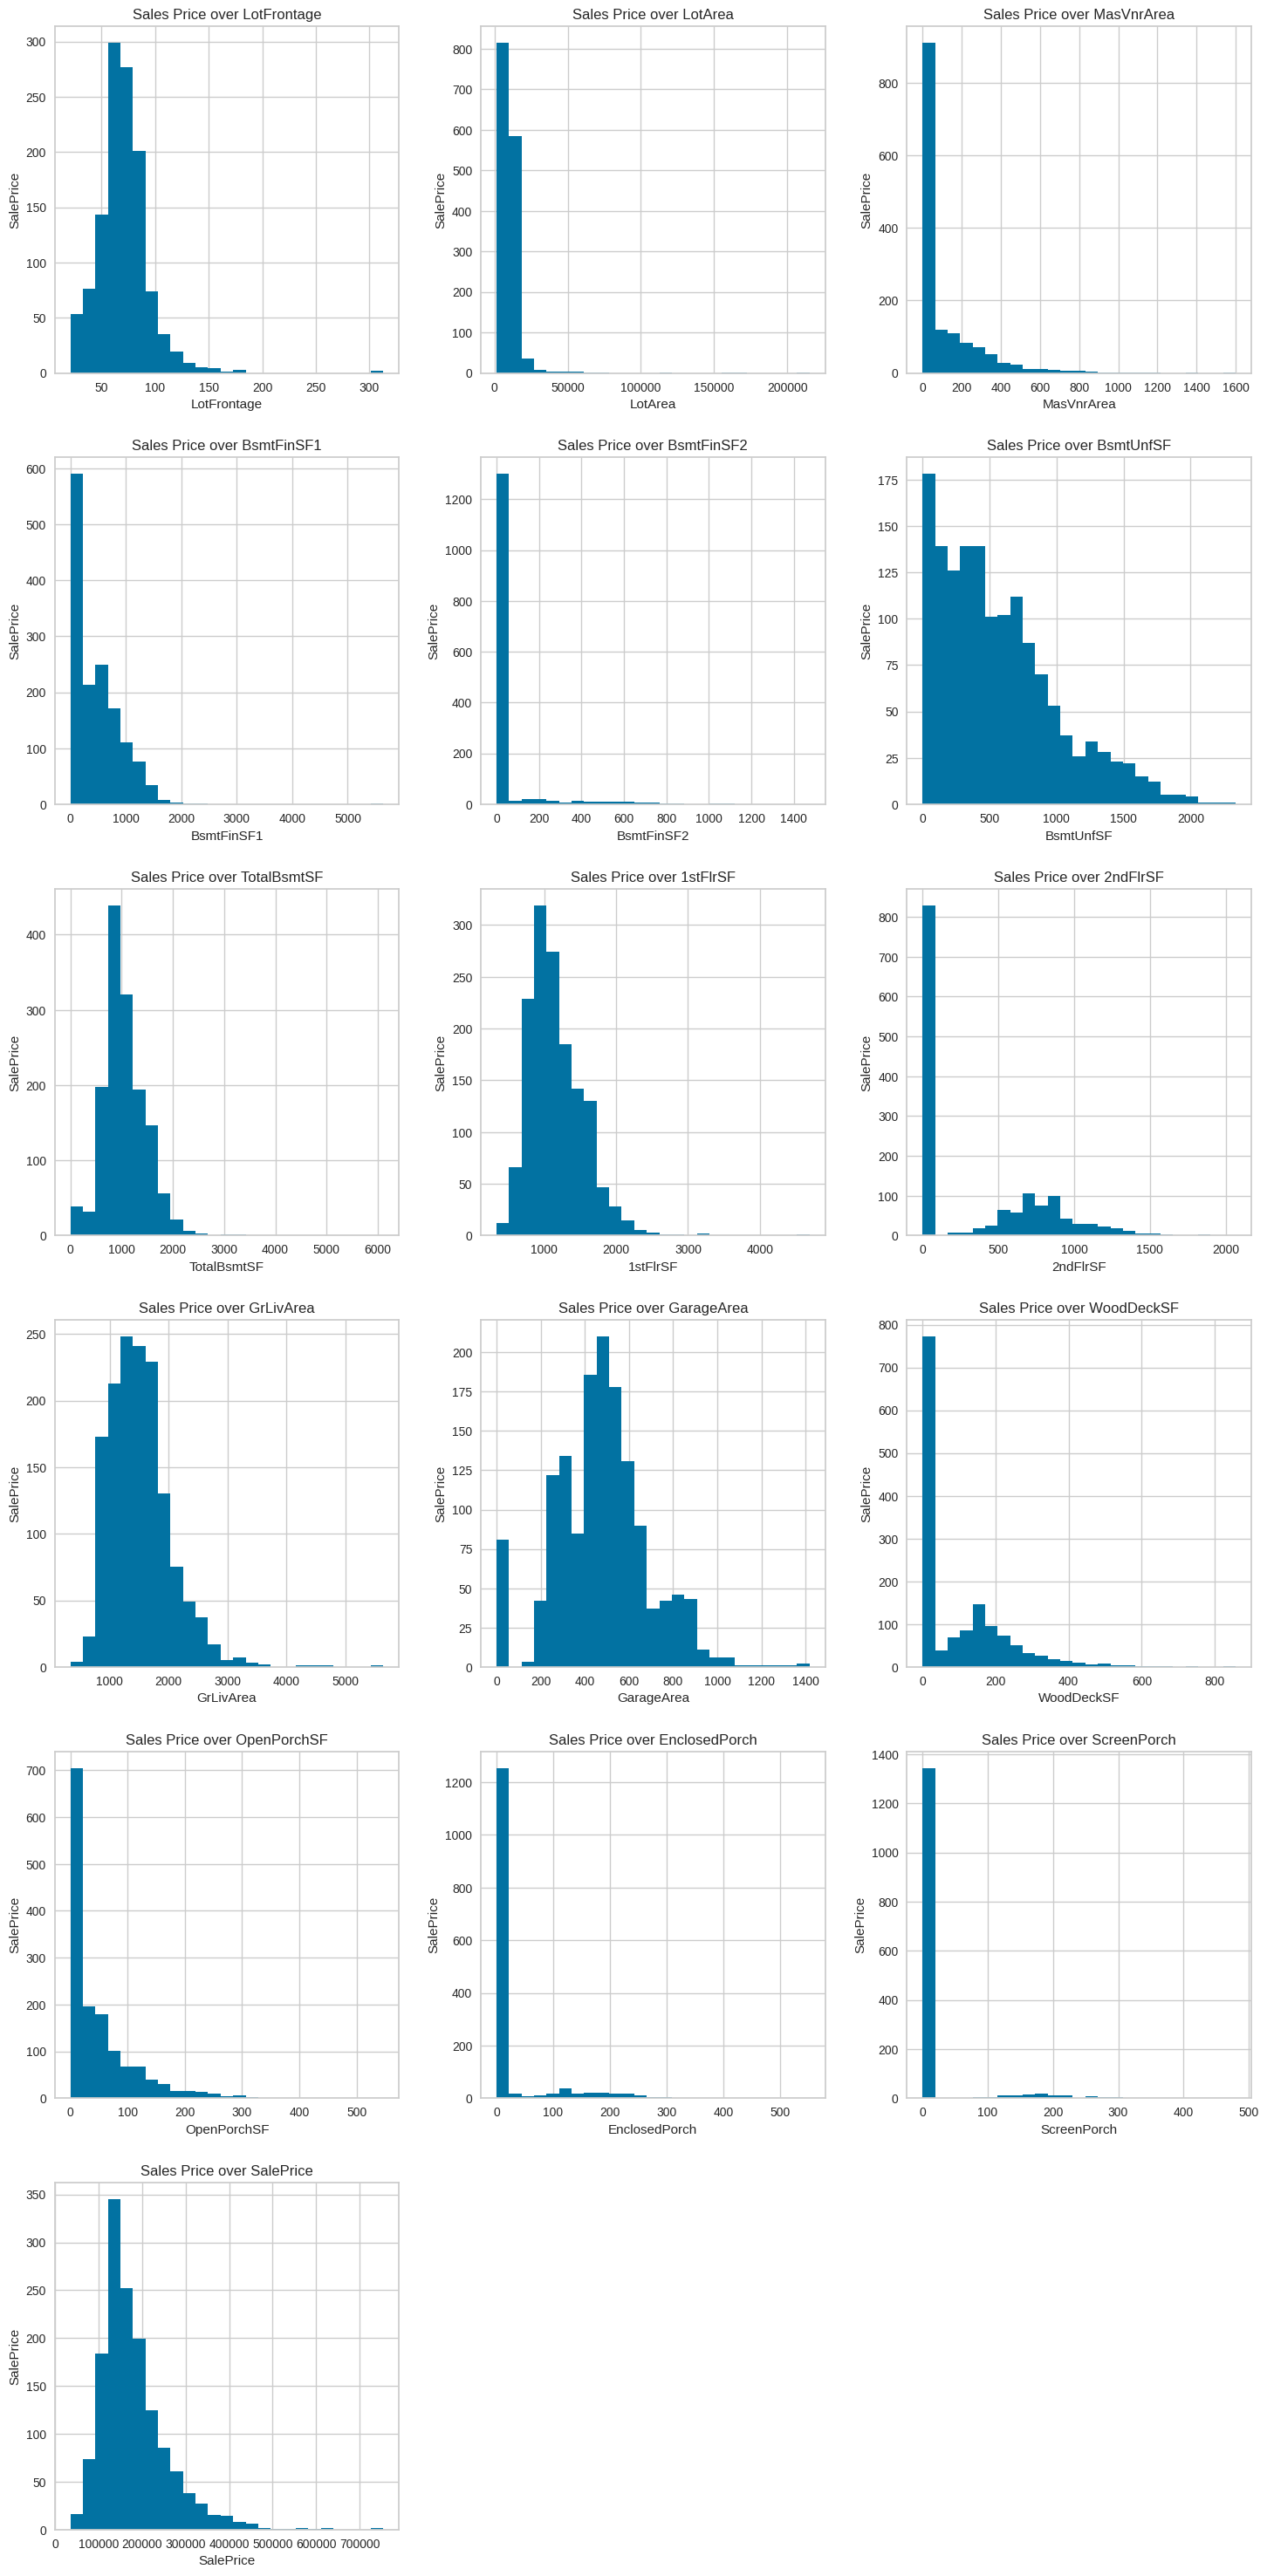

In [ ]:
# Calculating the number of rows and columns for subplots, as I want 3 columns and rest will be with number of feat
n_plots = len(continous_varibales)
n_cols = 3
n_rows = -(-n_plots // n_cols)

# CreatING the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flatteing the axs array if more than one row
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Ploting chart for each feature
for idx, feature in enumerate(continous_varibales):
    # Copy the dataset
    data_for_continous = df.copy()

    # Creating the histogram
    data_for_continous[feature].plot.hist(ax=axs[idx], bins=25)
    axs[idx].set_xlabel(feature)
    axs[idx].set_ylabel('SalePrice')
    axs[idx].set_title(f'Sales Price over {feature}')

# Hiding any unused subplots
for i in range(n_plots, len(axs)):
    fig.delaxes(axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(pad=2.0)
plt.show()

5. **Categorical Variables**

In [ ]:
categorical_features = [features for features in df.columns if df[features].dtypes =='O']

categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for features in categorical_features:
  print('Feature is {} and the number of categories are {}:'.format(features, len(df[features].unique())))

Feature is MSSubClass and the number of categories are 15:
Feature is MSZoning and the number of categories are 5:
Feature is Street and the number of categories are 2:
Feature is Alley and the number of categories are 3:
Feature is LotShape and the number of categories are 4:
Feature is LandContour and the number of categories are 4:
Feature is Utilities and the number of categories are 2:
Feature is LotConfig and the number of categories are 5:
Feature is LandSlope and the number of categories are 3:
Feature is Neighborhood and the number of categories are 25:
Feature is Condition1 and the number of categories are 9:
Feature is Condition2 and the number of categories are 8:
Feature is BldgType and the number of categories are 5:
Feature is HouseStyle and the number of categories are 8:
Feature is RoofStyle and the number of categories are 6:
Feature is RoofMatl and the number of categories are 8:
Feature is Exterior1st and the number of categories are 15:
Feature is Exterior2nd and t

6. **Distribution of Numberical Variables with Target variable**

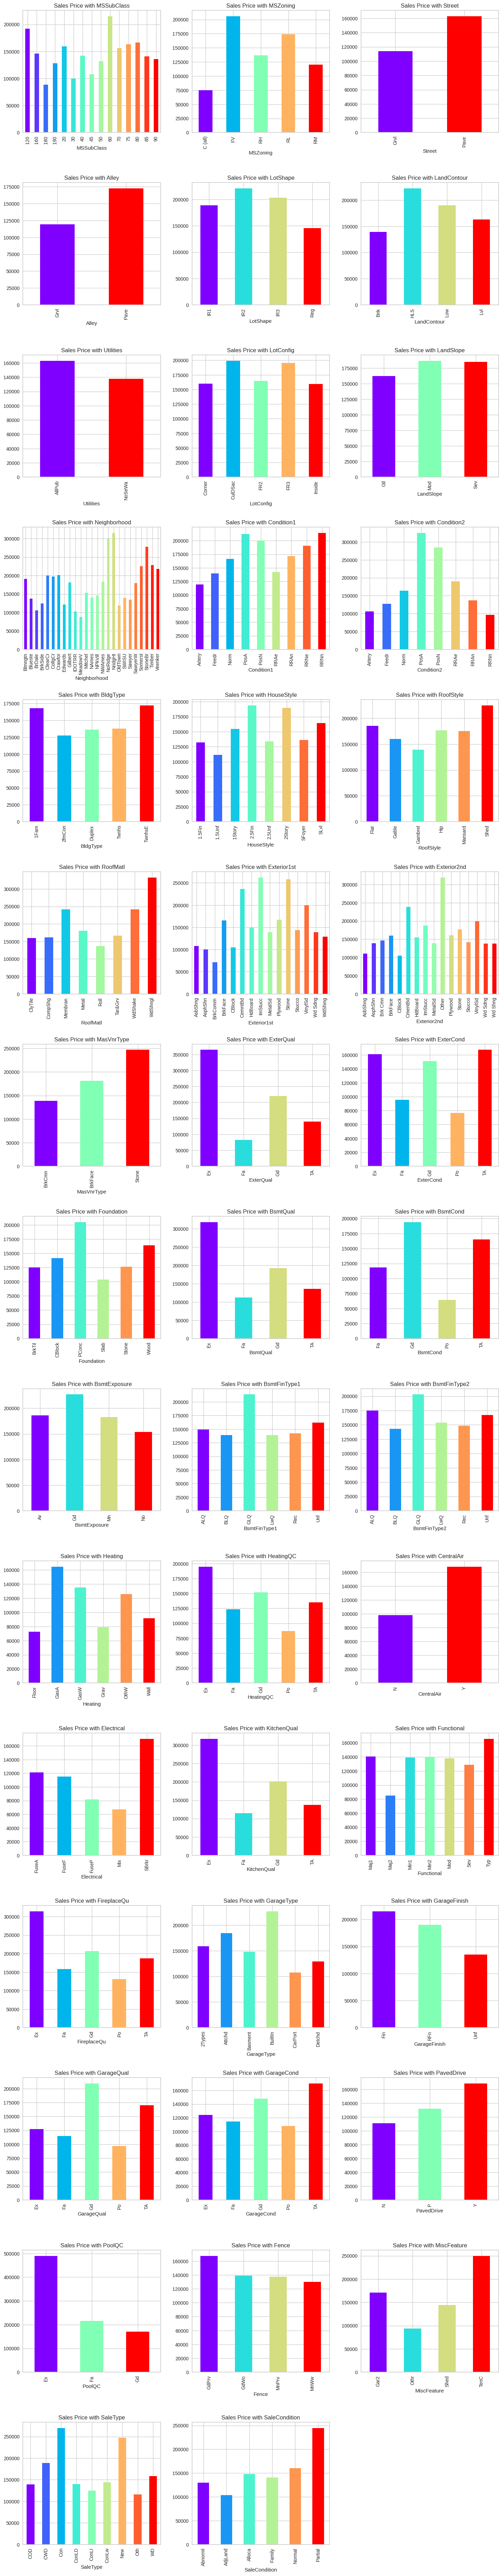

In [ ]:
# Calculating the number of rows and columns for subplots, as I want 3 columns and rest will be with number of feat
n_plots = len(categorical_features)
n_cols = 3
n_rows = -(-n_plots // n_cols)

# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flattening the axs array if more than one row
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Ploting chart for  each feature
for idx, feature in enumerate(categorical_features):

    # Copying the dataset
    data_for_discrete = df.copy()

    # Calculating the median SalePrice with discrete variables
    plot_data = data_for_discrete.groupby(feature)['SalePrice'].median()

    # Creating a colormap
    colors = cm.rainbow(np.linspace(0, 1, len(plot_data)))

    # Creating the bar plot
    plot_data.plot.bar(ax=axs[idx], color = colors)
    axs[idx].set_title(f'Sales Price with {feature}')


# Hide any unused subplots
for i in range(n_plots, len(axs)):
    fig.delaxes(axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(pad=2.0)
plt.show()

7. **Outliers**

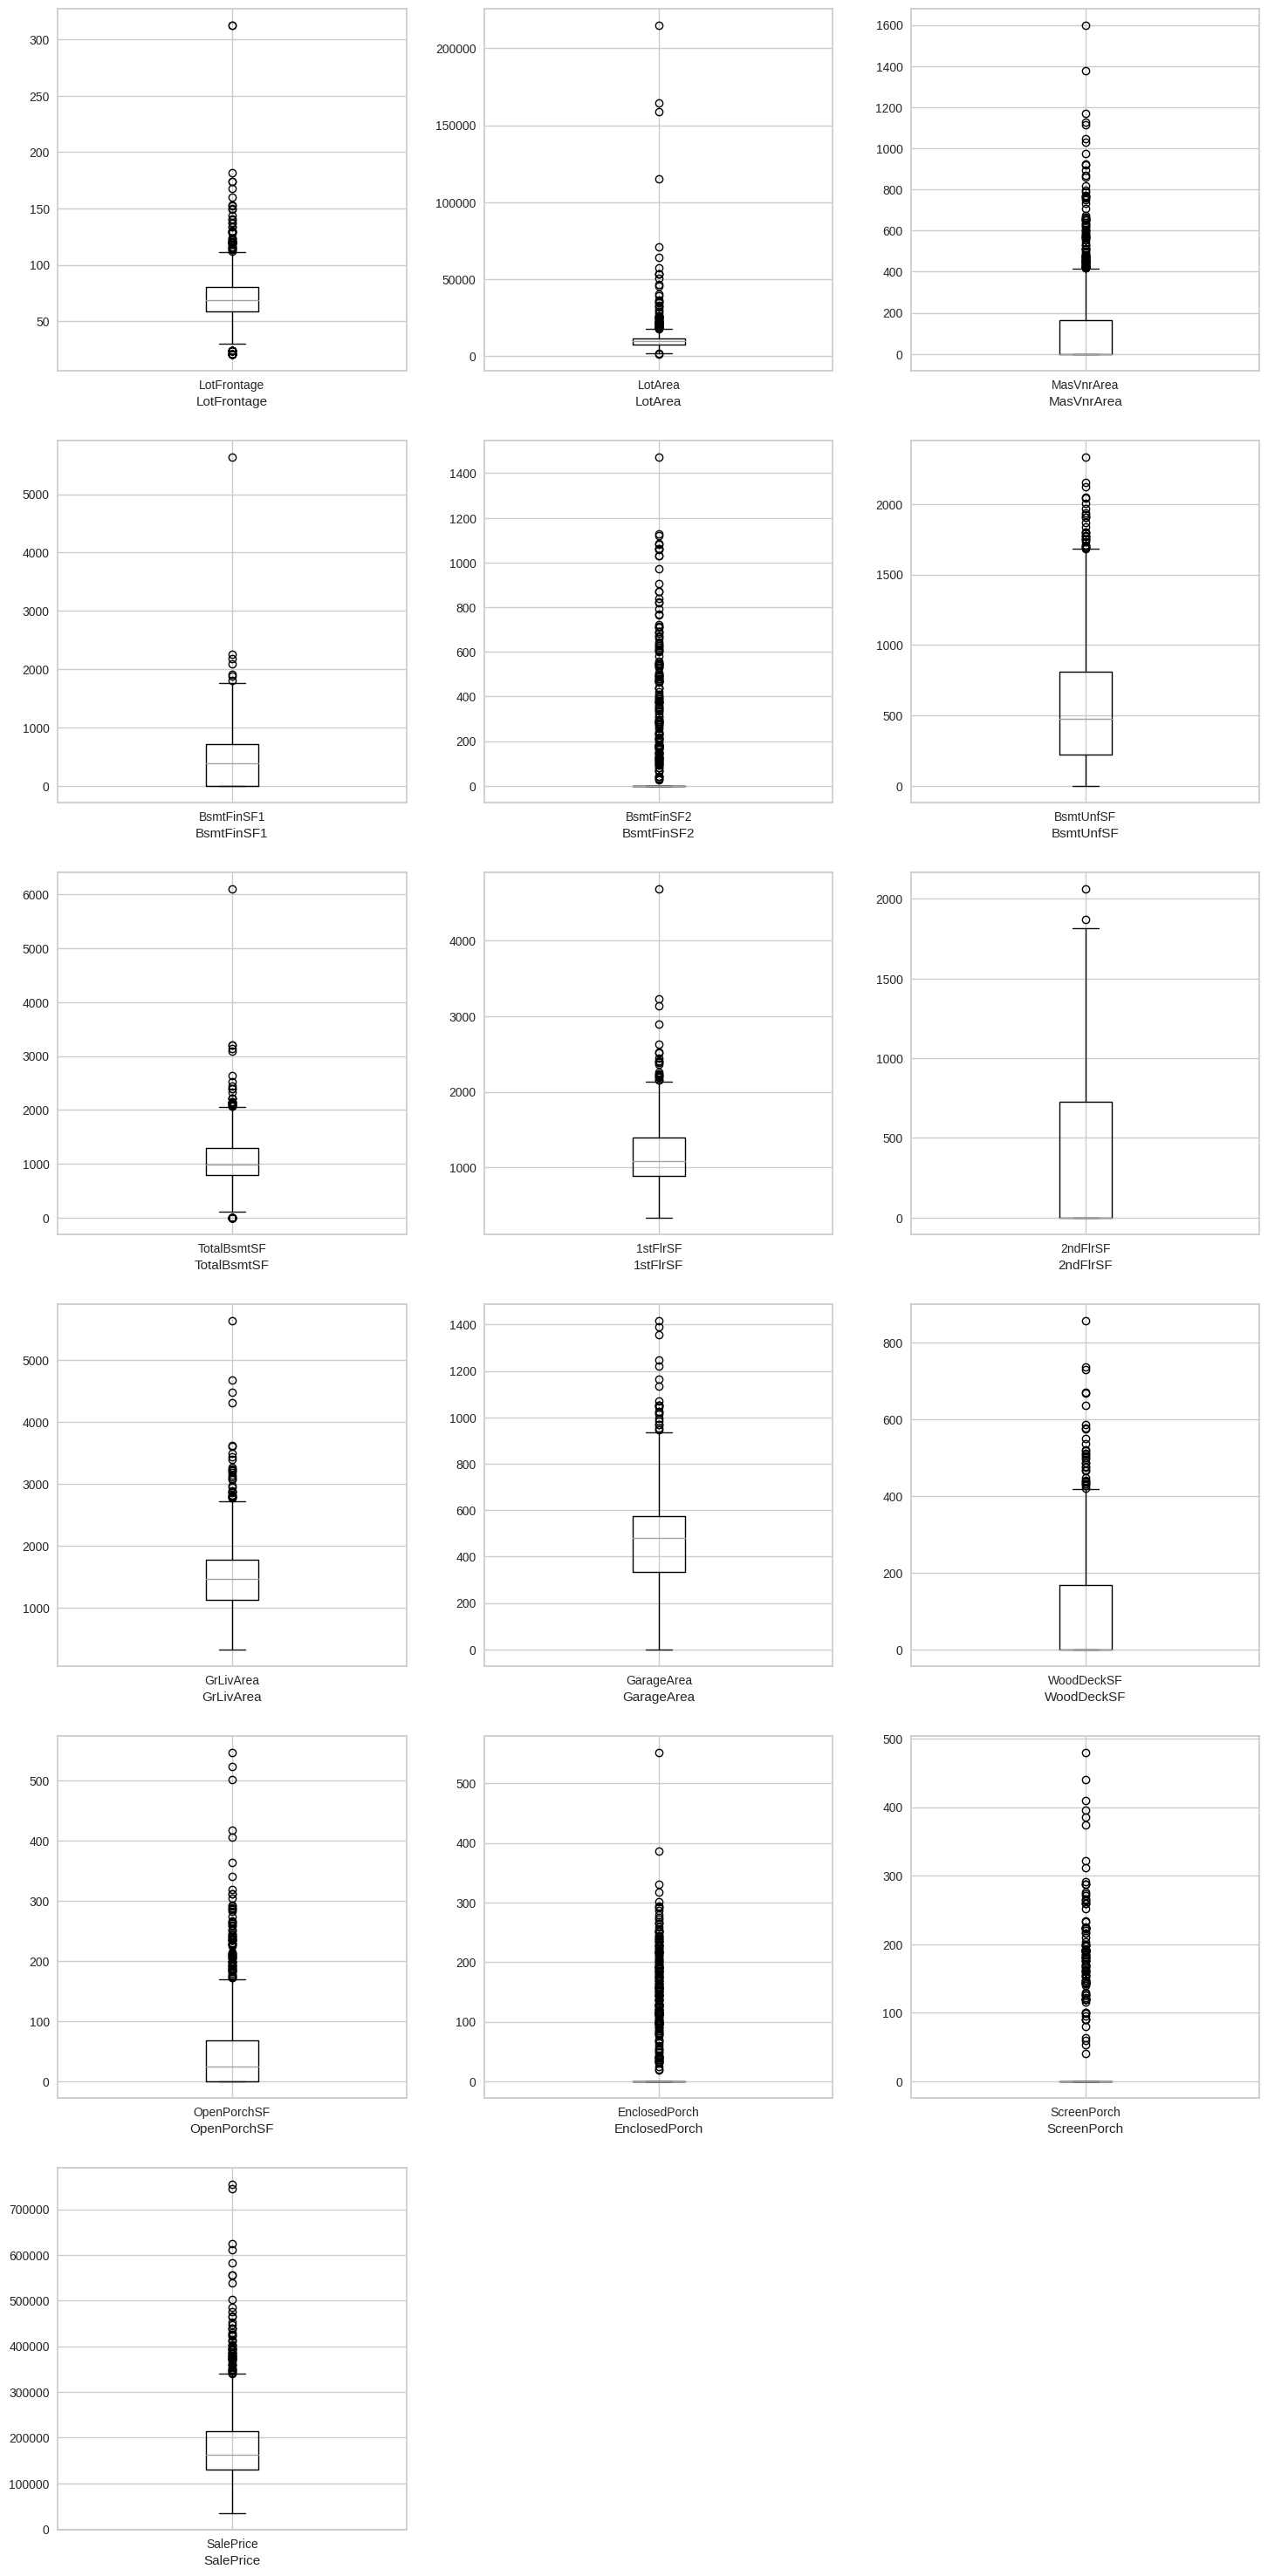

In [ ]:
# Calculating the number of rows and columns for subplots, as I want 3 columns and rest will be with number of feat
n_plots = len(continous_varibales)
n_cols = 3
n_rows = -(-n_plots // n_cols)

# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flattening the axs array if more than one row
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Ploting chart for each feature
for idx, feature in enumerate(continous_varibales):
    # Copying the dataset
    data_for_continous = df.copy()

    # Creating the histogram
    data_for_continous.boxplot(column = [feature], ax= axs[idx])
    axs[idx].set_xlabel(feature)

# Hiding any unused subplots
for i in range(n_plots, len(axs)):
    fig.delaxes(axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(pad=2.0)
plt.show()

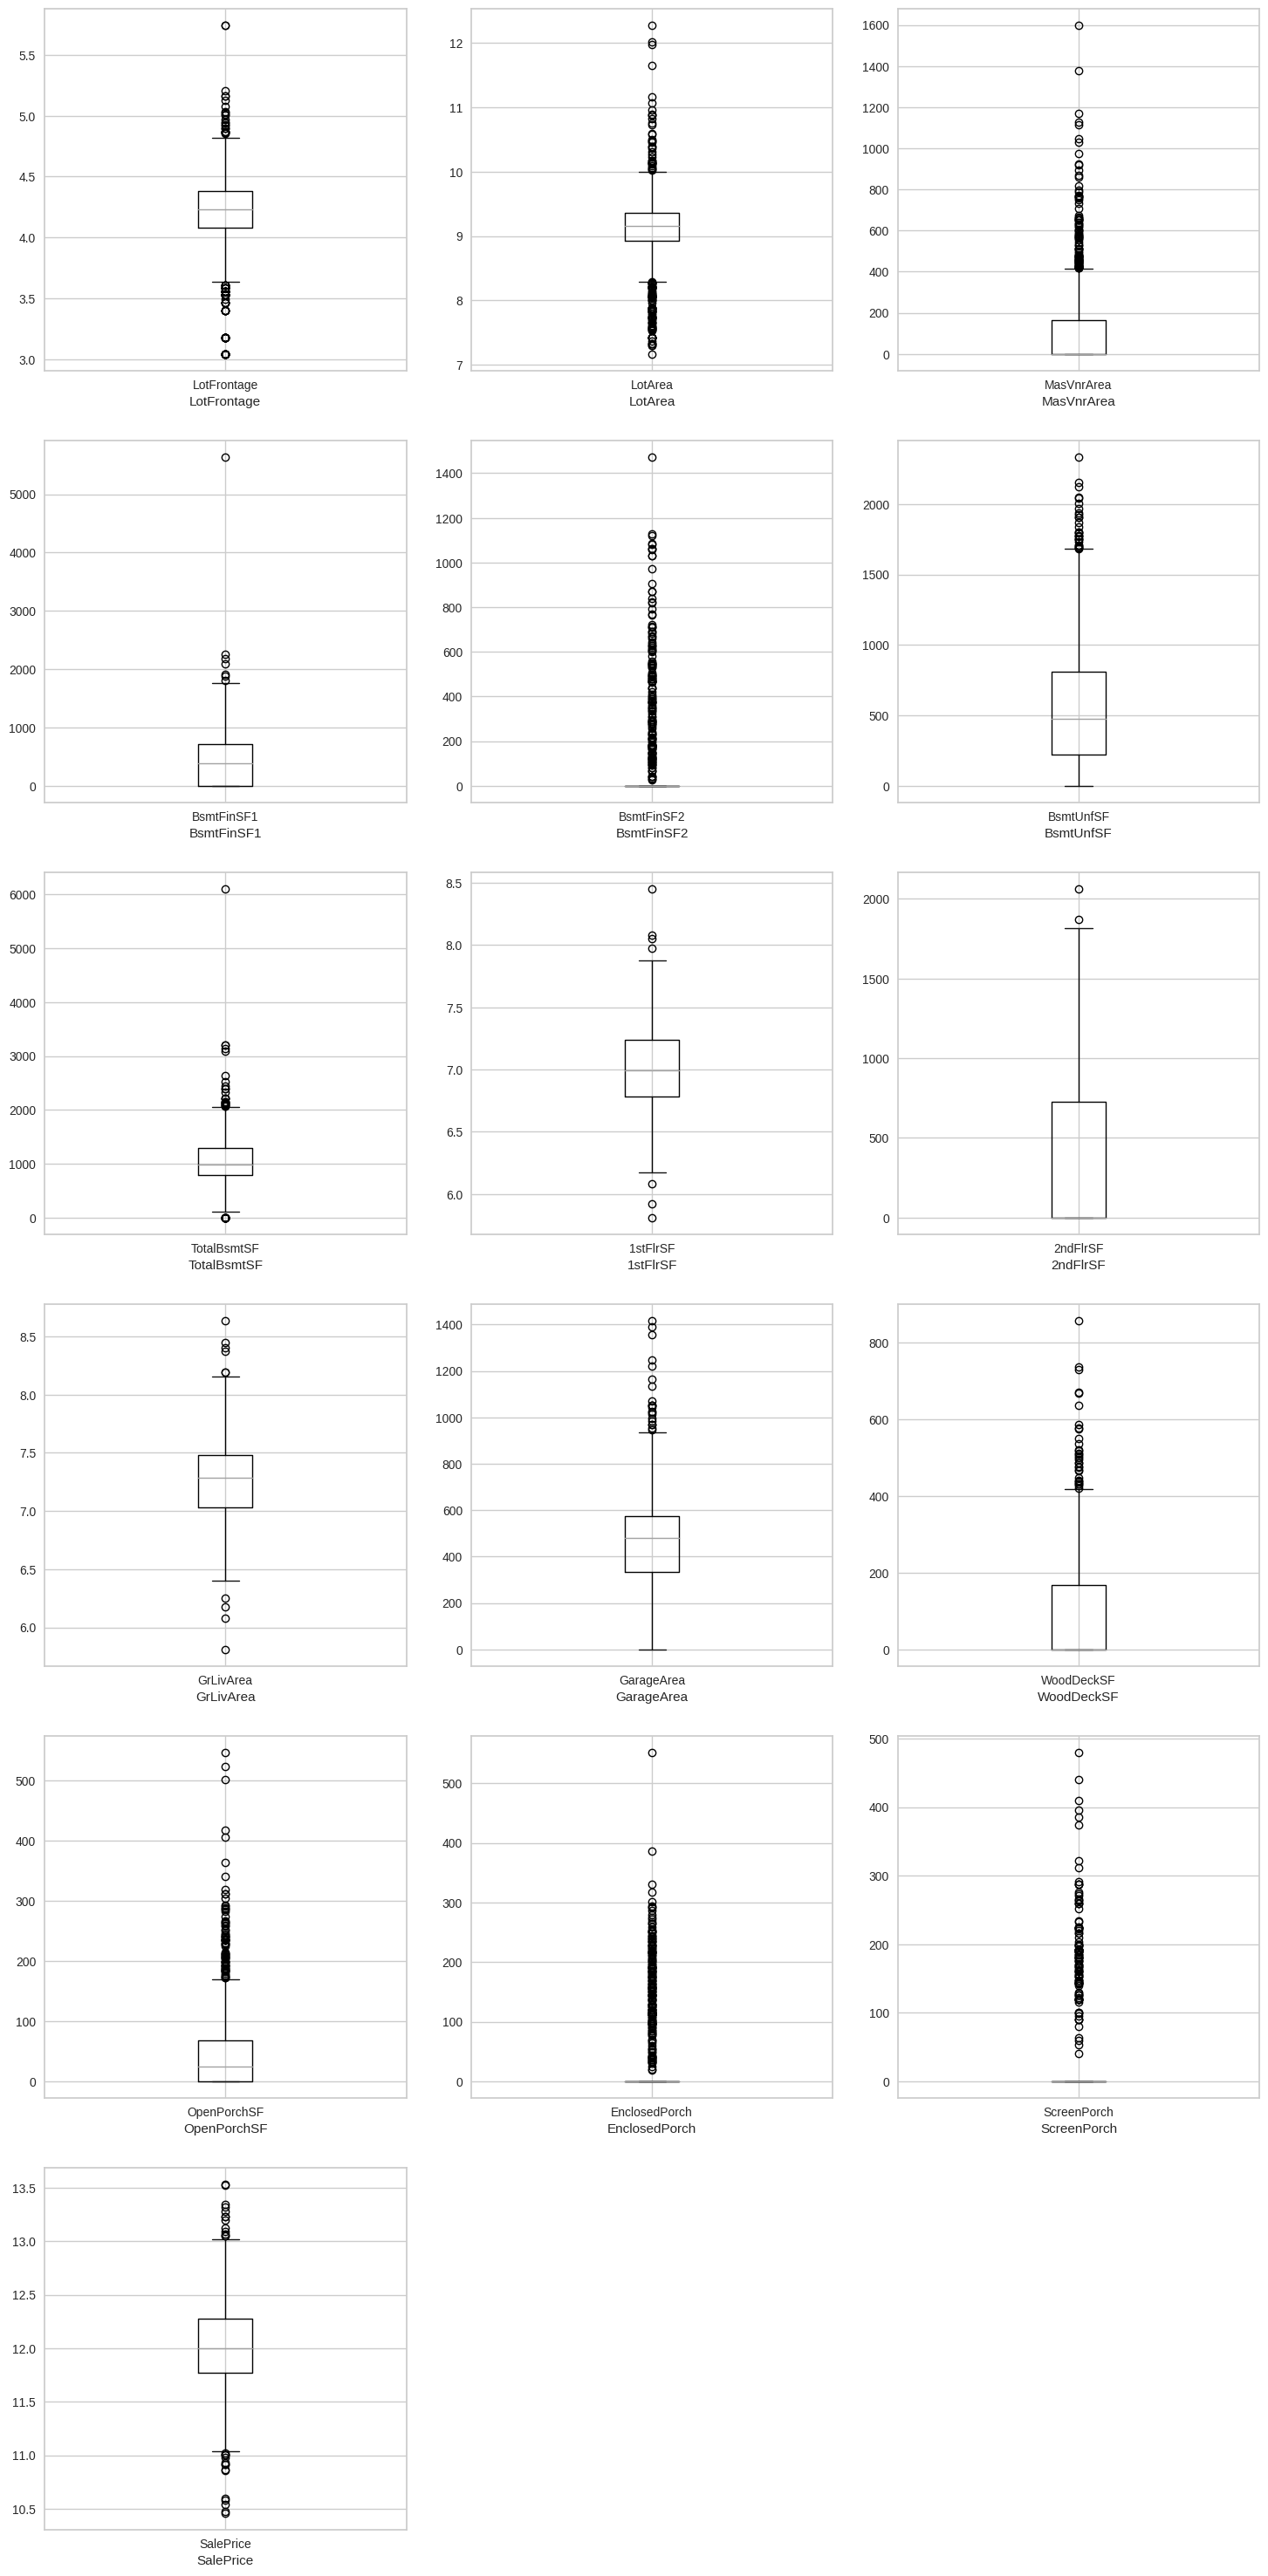

In [ ]:
# Calculating the number of rows and columns for subplots, as I want 3 columns and rest will be with number of feat
n_plots = len(continous_varibales)
n_cols = 3
n_rows = -(-n_plots // n_cols)

# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flattening the axs array if more than one row
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Ploting for each feature
for idx, feature in enumerate(continous_varibales):
    # Copying the dataset
    data_for_continous = df.copy()

    if 0 in data_for_continous[feature].unique():
      pass
    else:
      data_for_continous[feature]= np.log(data_for_continous[feature])

    # Creating the histogram
    data_for_continous.boxplot(column = [feature], ax= axs[idx])
    axs[idx].set_xlabel(feature)

# Hiding any unused subplots
for i in range(n_plots, len(axs)):
    fig.delaxes(axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout(pad=2.0)
plt.show()

## **Feature Engineering**

Below are the steps followed for feature Engineering (not in the same order)
1. Handling Missing Values
2. Temporal variables
3. Converting Numerical Features to Categorical features (if required)
4. Converting Categorical features in numerical features
5. Converting Nominal Categorgies using OneHot Encoding (we can use any encoding method)

In [ ]:
#making sure until to keep a copy of dataset which does not effect anything to the original dataset
df_FE = df_full.copy()

In [ ]:
df_FE['MSZoning'].isna().sum()

4

1. **Handling Missing Values**

Categorical Variables

In [ ]:
Missing_categorical_features = [feature for feature in df_FE[categorical_features] if df_FE[feature].isna().sum()]

for feature in Missing_categorical_features:
  print("{} : {}% missing values".format(feature,np.round(df_FE[feature].isna().sum()/len(df_FE[feature])*100,4)))

MSZoning : 0.137% missing values
Alley : 93.2169% missing values
Utilities : 0.0685% missing values
Exterior1st : 0.0343% missing values
Exterior2nd : 0.0343% missing values
MasVnrType : 60.5002% missing values
BsmtQual : 2.7749% missing values
BsmtCond : 2.8092% missing values
BsmtExposure : 2.8092% missing values
BsmtFinType1 : 2.7064% missing values
BsmtFinType2 : 2.7407% missing values
Electrical : 0.0343% missing values
KitchenQual : 0.0343% missing values
Functional : 0.0685% missing values
FireplaceQu : 48.6468% missing values
GarageType : 5.3786% missing values
GarageFinish : 5.4471% missing values
GarageQual : 5.4471% missing values
GarageCond : 5.4471% missing values
PoolQC : 99.6574% missing values
Fence : 80.4385% missing values
MiscFeature : 96.4029% missing values
SaleType : 0.0343% missing values


In [ ]:
Constant_Label_cat_features = ['Alley',
                               'BsmtQual',
                               'BsmtCond',
                               'BsmtExposure',
                               'BsmtFinType1',
                               'BsmtFinType2',
                               'Electrical',
                               'FireplaceQu',
                               'GarageType',
                               'GarageFinish' ,
                               'GarageQual',
                               'GarageCond',
                               'PoolQC',
                               'Fence',
                               'MiscFeature' ]
Mode_Label_cat_features = ['MSZoning',
                           'MasVnrType',
                           'Utilities',
                           'Exterior1st',
                           'Exterior2nd',
                           'KitchenQual',
                           'Functional',
                           'SaleType']

In [ ]:
#Replacing all the missing (nan) values with a label,

for features in Constant_Label_cat_features:
  df_FE[features]= df_FE[features].fillna('NA')

for features in Mode_Label_cat_features:
  df_FE[features]= df_FE[features].fillna(df_FE[features].mode()[0])

df_FE[Missing_categorical_features].isna().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

Numerical Variables

In [ ]:
Missing_numerical_features = [feature for feature in df_FE.columns if df_FE[feature].dtypes != 'O' and df_FE[feature].isna().sum() > 0]

for feature in Missing_numerical_features:
  print("{} : {}% missing values".format(feature,np.round(df_FE[feature].isna().mean(),4)))

LotFrontage : 0.1665% missing values
MasVnrArea : 0.0079% missing values
BsmtFinSF1 : 0.0003% missing values
BsmtFinSF2 : 0.0003% missing values
BsmtUnfSF : 0.0003% missing values
TotalBsmtSF : 0.0003% missing values
BsmtFullBath : 0.0007% missing values
BsmtHalfBath : 0.0007% missing values
GarageYrBlt : 0.0545% missing values
GarageCars : 0.0003% missing values
GarageArea : 0.0003% missing values
SalePrice : 0.4998% missing values


In [ ]:
#Replacing all the missing (nan) values with a label
for feature in Missing_numerical_features:
  median_values = df_FE[feature].median()

  df_FE[feature+'nan'] = np.where(df_FE[feature].isna(),1,0)
  df_FE[feature].fillna(median_values, inplace = True)

df_FE[Missing_numerical_features].isna().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [ ]:
df_FE.columns.isna().sum()

0

2. **Temporal Variables**

In [ ]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  df_FE[feature] = df_FE['YrSold']-df_FE[feature]


In [ ]:
df_FE.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,0,0


3. **Converting Numerical Features to Categorical features**

In [ ]:
num_conv = ['MSSubClass','YrSold' ,'MoSold' ]

In [ ]:
df_FE['MoSold'] = df_FE['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [ ]:
df_FE['MoSold'].value_counts()

MoSold
Jun    503
Jul    446
May    394
Apr    279
Aug    233
Mar    232
Oct    173
Sep    158
Nov    142
Feb    133
Jan    122
Dec    104
Name: count, dtype: int64

In [ ]:
for feature in num_conv:
  df_FE[feature] =  df_FE[feature].astype(str)

4. **Converting Categorical features in numerical features**


In [ ]:
order_mappings = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'PavedDrive': ['N', 'P', 'Y'],
    'CentralAir': ['N', 'Y'],
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
}

In [ ]:
# Function to apply ordered label encoding for specific columns
def apply_label_encoding(df, order_mappings):
    df_encoded = df_FE.copy()
    for col, order_list in order_mappings.items():
        df_encoded[col] = df_FE[col].apply(lambda x: order_list.index(x))
    return df_encoded

In [ ]:
# Apply ordered label encoding to specific columns
df_encoded_ordered = apply_label_encoding(df_FE, order_mappings)

In [ ]:
df_encoded_ordered['Utilities'].value_counts()

Utilities
3    2918
1       1
Name: count, dtype: int64

In [ ]:
df_FE['Utilities'].value_counts()

Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64

In [ ]:
df_encoded_ordered.dtypes

MSSubClass          object
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
Alley               object
LotShape            object
LandContour         object
Utilities            int64
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual            int64
ExterCond            int64
Foundation          object
BsmtQual             int64
BsmtCond             int64
BsmtExposure         int64
BsmtFinType1         int64
BsmtFinSF1         float64
BsmtFinType2         int64
BsmtFinSF2         float64
BsmtUnfSF          float64
T

5. **Converting Nominal Categorgies using OneHot Encoding**

In [ ]:
Cat_features_to_encode = df_encoded_ordered.select_dtypes(include = 'object').columns.to_list()
print(len(Cat_features_to_encode))
Cat_features_to_encode

27


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [ ]:
def one_hot_encode(df, columns):
    encoder = OneHotEncoder(sparse_output = False , drop='first')

    # Encode each column and concatenate the result
    encoded_dfs = []
    for column in columns:
        encoded = encoder.fit_transform(df[[column]])
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column]))
        encoded_dfs.append(encoded_df)

    # Drop the original columns and concatenate the new one-hot encoded columns
    df = df.drop(columns=columns)
    encoded_df = pd.concat(encoded_dfs, axis=1)
    df = pd.concat([df, encoded_df], axis=1)

    return df

df_after_encoding =df_encoded_ordered.copy()
encoded_df = one_hot_encode(df_after_encoding, Cat_features_to_encode)

In [ ]:
encoded_df.shape

(2919, 245)

7. **Transforming the dataset**

In [ ]:
def log_transform(df, columns):
    transformed_df = encoded_df.copy()

    for column in transformed_df.columns:
        if (transformed_df[column] == 0).any():
            transformed_df[column] = np.log(transformed_df[column] + 0.000001)
        else:
            transformed_df[column] = np.log(transformed_df[column])
    return transformed_df

# Applying the log transformation
transformed_encoded_data = log_transform(df, numerical_features)

In [ ]:
transformed_encoded_data.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.174387,9.041922,1.098612,1.945910,1.609438,1.609438,1.609438,5.278115,1.098612,0.693148,1.386295,1.098613,9.999995e-07,1.791760,6.559615,9.999995e-07,-13.815511,5.010635,6.752270,1.386295,9.999995e-07,6.752270,6.749931,-13.815511,7.444249,9.999995e-07,-1.3815

6. **Spliting data for Training and Testing**

In [ ]:
len_train = df_train.shape[0]
X_train = encoded_df[: len_train].drop('SalePrice', axis = 1)
y_train = encoded_df["SalePrice"][ :len_train]
X_test = encoded_df[len_train:].drop('SalePrice', axis = 1)

print("Shape of X train :" , X_train.shape)
print("Shape of Y train :" , y_train.shape)
print("Shape of X test :" , X_test.shape)


Shape of X train : (1460, 244)
Shape of Y train : (1460,)
Shape of X test : (1459, 244)


# **Feature Scaling**

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
log_y_train = np.log(y_train)

# **Training  and Testing the Model**

In [ ]:
_ = setup(data = X_train, target = log_y_train)

,Description,Value
0,Session id,5969
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 245)"
4,Transformed data shape,"(1460, 245)"
5,Transformed train set shape,"(1021, 245)"
6,Transformed test set shape,"(439, 245)"
7,Numeric features,244
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0891,0.0187,0.1345,0.8882,0.0105,0.0075,0.0920
gbr,Gradient Boosting Regressor,0.0927,0.0196,0.1379,0.8820,0.0107,0.0078,0.9320
omp,Orthogonal Matching Pursuit,0.0921,0.0200,0.1387,0.8801,0.0107,0.0077,0.0700
lightgbm,Light Gradient Boosting Machine,0.0950,0.0200,0.1399,0.8793,0.0109,0.0080,1.2200
ridge,Ridge Regression,0.0947,0.0206,0.1414,0.8776,0.0111,0.0080,0.0800
rf,Random Forest Regressor,0.0990,0.0218,0.1462,0.8678,0.0114,0.0083,2.2520
et,Extra Trees Regressor,0.0982,0.0221,0.1477,0.8659,0.0115,0.0082,2.6220
xgboost,Extreme Gradient Boosting,0.1032,0.0238,0.1517,0.8561,0.0118,0.0086,0.5620
ada,AdaBoost Regressor,0.1329,0.0318,0.1776,0.8061,0.0138,0.0111,0.4210
knn,K Neighbors Regressor,0.1507,0.0448,0.2108,0.7262,0.0163,0.0126,0.1270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

BayesianRidge()

In [ ]:
#Taking only top 3 models
lgbm = lgb.LGBMRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
brm = BayesianRidge()
orl = OrthogonalMatchingPursuit()



In [ ]:
models = {

    "a" : ["BayesianRidge", brm],
    "b" : ["GradientBoostingRegressor", gbr],
    "c" : ["OrthogonalMatchingPursuit", orl],
    "d" : ["LGBMRegressor", lgbm],
    "e" : ["XGBRegressor", xgb]
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def test_model(model, X_train, y_train):
  cv = KFold(n_splits=10, shuffle=True, random_state= 45)
  r2_val_score =  np.exp(np.sqrt(-cross_val_score(model, X_train, y_train, cv= cv, scoring='neg_mean_squared_error')))
  score = [r2_val_score.mean()]
  return score

In [ ]:
model_score = []
for model in models:
  score = test_model(models[model][1], X_train, log_y_train)
  model_score.append([models[model][0], score[0]])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 158
[LightGBM] [Info] Start training from score 12.026196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3384
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 158
[LightGBM] [Info] Start training from score 12.022179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [ ]:
score_df = pd.DataFrame(model_score, columns=['Model', 'Score'])
print(score_df.to_string(index=False))

                    Model    Score
            BayesianRidge 1.158860
GradientBoostingRegressor 1.138959
OrthogonalMatchingPursuit 1.163576
            LGBMRegressor 1.138143
             XGBRegressor 1.157024


# **BaseLine Model**

In [ ]:
#selected only the top model we get late we can do the bagging as well
test_cv = KFold(n_splits=10, shuffle=True, random_state= 45)
test_r2_val_score =  cross_val_score(lgbm, X_train, log_y_train, cv= test_cv, scoring='neg_mean_squared_error')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 158
[LightGBM] [Info] Start training from score 12.026196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3384
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 158
[LightGBM] [Info] Start training from score 12.022179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

In [ ]:
np.exp(np.sqrt(np.mean(-test_r2_val_score)))

1.1391308492278458

In [ ]:
baseline_model = gbr.fit(X_train, log_y_train)

In [ ]:
np.exp(baseline_model.predict(X_test))

array([118470.62826034, 155101.21875184, 181093.70452728, ...,
       166264.87644471, 125363.02469825, 232988.42157149])

In [ ]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': np.exp(baseline_model.predict(X_test))})
submission.to_csv('submission.csv', index=False)

In [96]:

# Colab2PDF v1.0.2 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>